# Download and loading dataset
Datset yang digunakan adalah dataset House Price Prediction yang didapatkan dari situs [Kaggle](https://www.kaggle.com/datasets/shree1992/housedata)

In [1]:
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"evanhanifwidiatama","key":"68f4401e633ad5ce14b61994b2154158"}'}

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
!mkdir data

In [4]:
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 8.12MB/s]


In [5]:
!unzip housedata.zip -d data

Archive:  housedata.zip
  inflating: data/data.csv           
  inflating: data/data.dat           
  inflating: data/output.csv         


In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [7]:
df = pd.read_csv('/content/data/data.csv')

In [8]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Dataset yang kita gunakan memiliki 4600 baris dan 18 kolom

# EDA

In [9]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3742,2014-07-01 00:00:00,729032.0,4.0,2.50,2840,12866,1.0,0,0,4,1780,1060,1977,0,3200 130th Ave NE,Bellevue,WA 98005,USA
3214,2014-06-24 00:00:00,455000.0,2.0,1.50,1200,1259,2.0,0,0,3,1000,200,2013,1923,301 27th Ave S,Seattle,WA 98144,USA
3232,2014-06-24 00:00:00,194000.0,3.0,1.00,1050,7577,1.0,0,0,3,1050,0,1983,2009,34810 18th Ave SW,Federal Way,WA 98023,USA
779,2014-05-15 00:00:00,720000.0,3.0,2.50,3150,151588,2.0,0,0,3,3150,0,2007,0,31215 SE 40th St,Fall City,WA 98024,USA
560,2014-05-13 00:00:00,628000.0,4.0,2.00,2260,6000,1.0,0,0,3,1430,830,1958,2004,8028 27th Ave NE,Seattle,WA 98115,USA
2837,2014-06-19 00:00:00,1325000.0,4.0,2.50,2440,3600,2.5,0,0,4,2440,0,1902,0,400 W Highland Dr,Seattle,WA 98119,USA
3770,2014-07-01 00:00:00,925000.0,5.0,5.50,5190,12637,2.0,0,2,3,5190,0,2001,0,6525 Cascade Ave SE,Snoqualmie,WA 98065,USA
2684,2014-06-17 00:00:00,449950.0,4.0,2.50,2470,3811,2.0,0,0,3,2470,0,1999,0,7206 Douglas Ave SE,Snoqualmie,WA 98065,USA
4217,2014-07-09 00:00:00,840000.0,3.0,2.00,2783,11177,2.0,0,0,3,2783,0,1910,1999,3672 SW Orchard St,Seattle,WA 98126,USA
1600,2014-05-30 00:00:00,2400000.0,4.0,3.25,4140,20734,1.0,0,1,3,3300,840,1977,2005,9415 NE 27th St,Clyde Hill,WA 98004,USA


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [11]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [12]:
df.drop(['country', 'statezip', 'date'], axis=1, inplace=True)

Drop kolom:
- Date: karena kurang berpengaruh ke model
- Statezip: mempersimpel model dan sudah bisa diwakilkan dengan city
- Country: Karena hanya ada 1 unique value

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


Deskripsi Variabel:
- Price: Merepresentasikan harga dalam USD dan merupakan fitur target
- Bedroom: Merepresentasikan jumlah kamar tidur
- Bathroom: Merepresentasikan jumlah kamar mandi
- sqft_living: Merepresentasikan ukuran luas rumah
- sqft_lot: Merepresentasikan ukuran luas tanah
- waterfront: Merepresentasikan akses ke jalur air

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


# EDA

## Missing value handling

In [15]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
dtype: int64

Tidak ada missing value

## Handling outliers

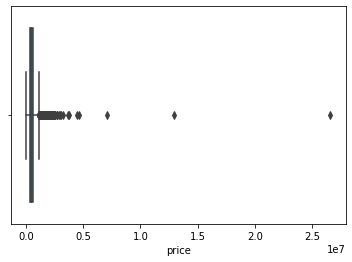

In [16]:
sns.boxplot(x=df['price'])

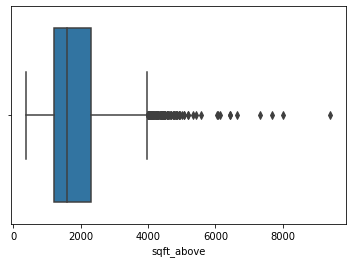

In [17]:
sns.boxplot(x=df['sqft_above'])

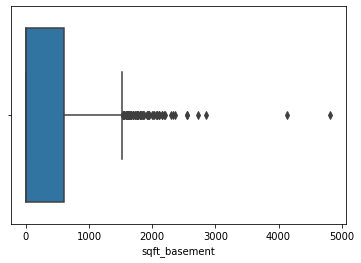

In [18]:
sns.boxplot(x=df['sqft_basement'])

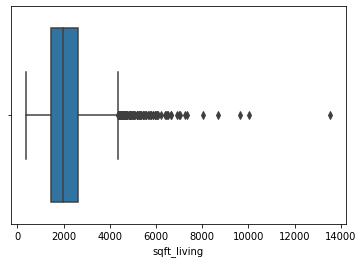

In [19]:
sns.boxplot(x=df['sqft_living'])

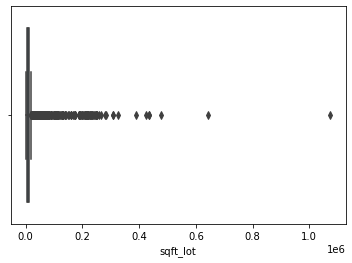

In [20]:
sns.boxplot(x=df['sqft_lot'])

Terlihat ada outliers di beberapa fitur, kita akan mengatasinya menggunakan metode IQR

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_IQR = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
print(f'size df setelah dilakukan handling outlies dengan IQR {df_IQR.shape}')

size df setelah dilakukan handling outlies dengan IQR (3448, 15)


<ipython-input-21-305caa0083a0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_IQR = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]


## Univariate Analysis

In [22]:
numerical_ft = df.select_dtypes(include=np.number).columns.tolist()
categorical_ft = df.select_dtypes(include=["object"]).columns.tolist()

In [23]:
numerical_ft

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [24]:
categorical_ft

['street', 'city']

In [25]:
feature = categorical_ft[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dfs = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfs)

                        jumlah sampel  persentase
2520 Mulberry Walk NE               4         0.1
2500 Mulberry Walk NE               3         0.1
9413 34th Ave SW                    2         0.0
6008 8th Ave NE                     2         0.0
11034 NE 26th Pl                    2         0.0
...                               ...         ...
1404 Broadmoor Dr E                 1         0.0
3249 E Ames Lake Dr NE              1         0.0
6032 35th Ave NE                    1         0.0
1006 NE Ravenna Blvd                1         0.0
18717 SE 258th St                   1         0.0

[4525 rows x 2 columns]


Drop fitur street karena terlalu banyak unique value

In [26]:
df.drop(['street'], axis=1, inplace=True)

In [27]:
feature = categorical_ft[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
dfs = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(dfs)

                     jumlah sampel  persentase
Seattle                       1573        34.2
Renton                         293         6.4
Bellevue                       286         6.2
Redmond                        235         5.1
Issaquah                       187         4.1
Kirkland                       187         4.1
Kent                           185         4.0
Auburn                         176         3.8
Sammamish                      175         3.8
Federal Way                    148         3.2
Shoreline                      123         2.7
Woodinville                    115         2.5
Maple Valley                    96         2.1
Mercer Island                   86         1.9
Burien                          74         1.6
Snoqualmie                      71         1.5
Kenmore                         66         1.4
Des Moines                      58         1.3
North Bend                      50         1.1
Covington                       43         0.9
Duvall       

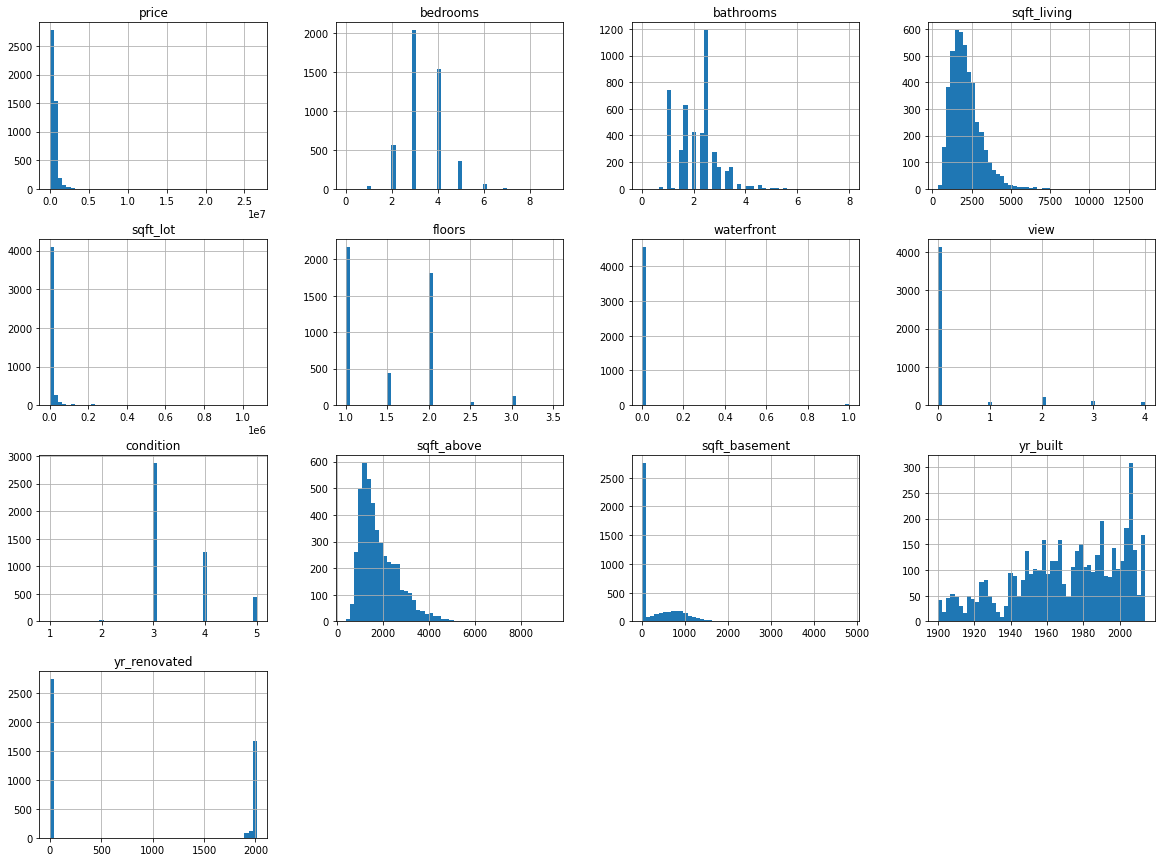

In [28]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analytics

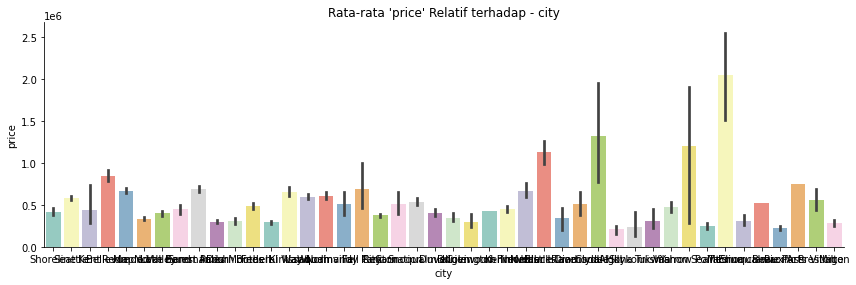

In [29]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

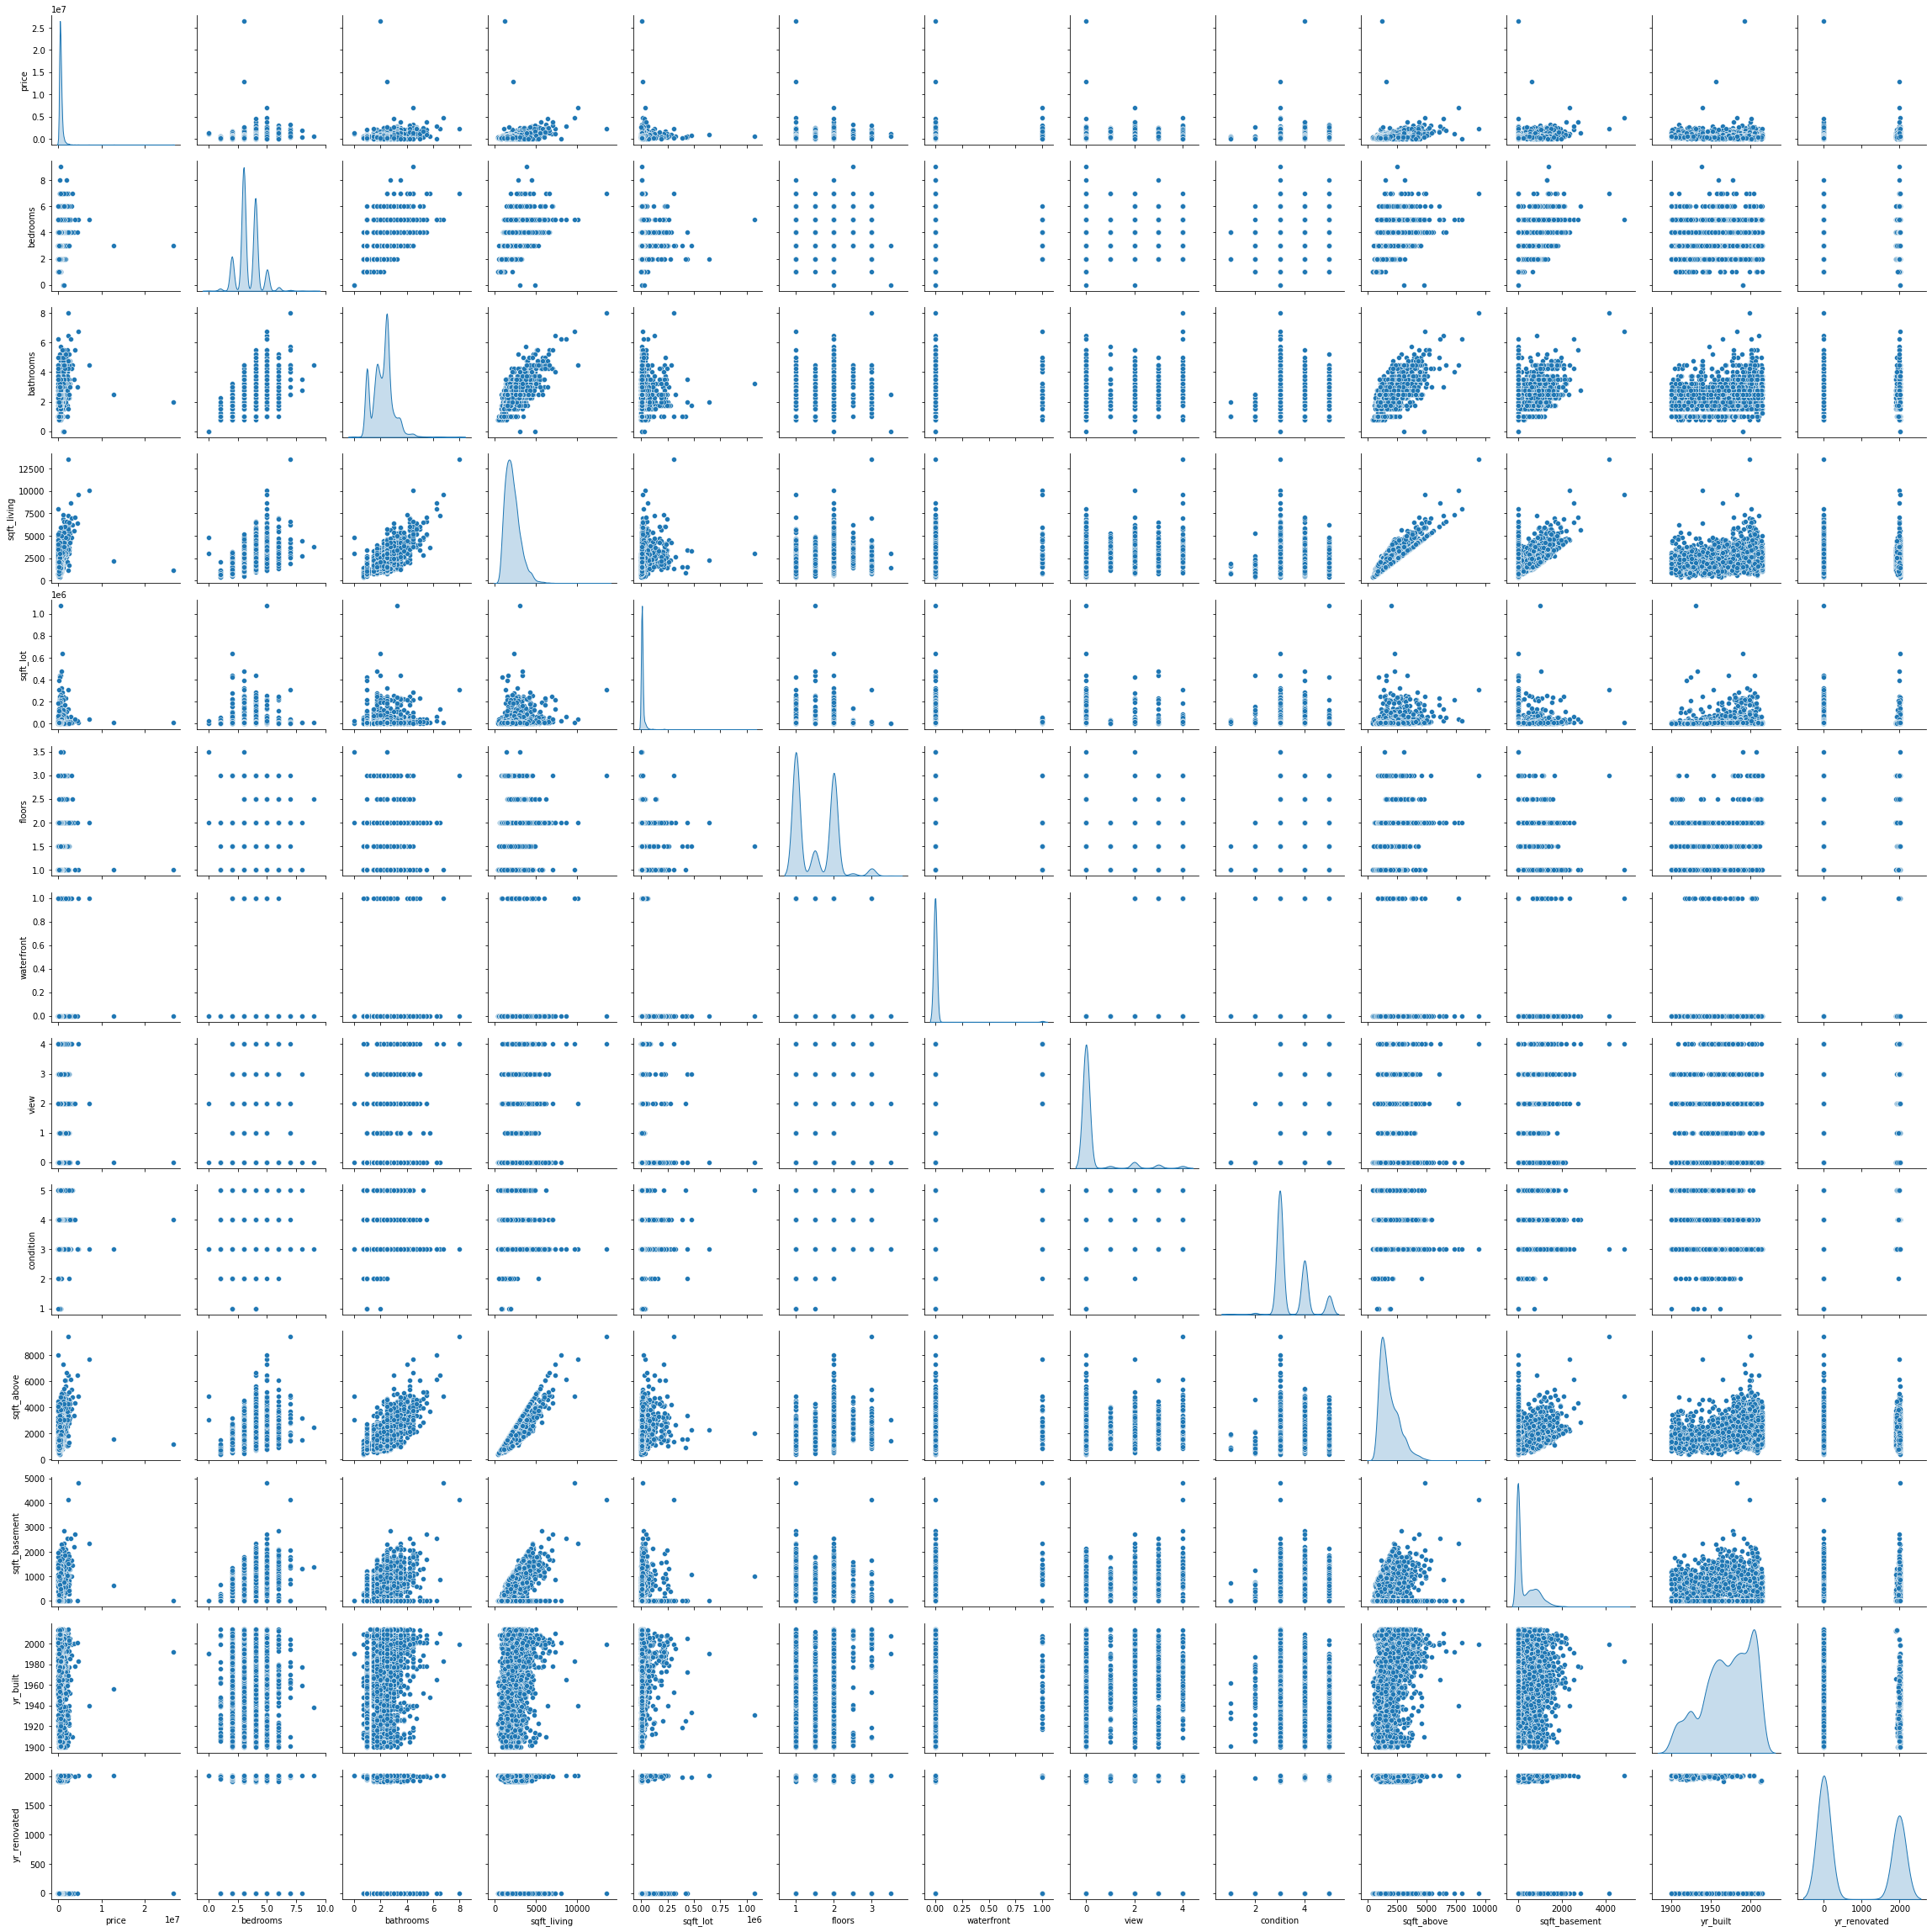

In [30]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

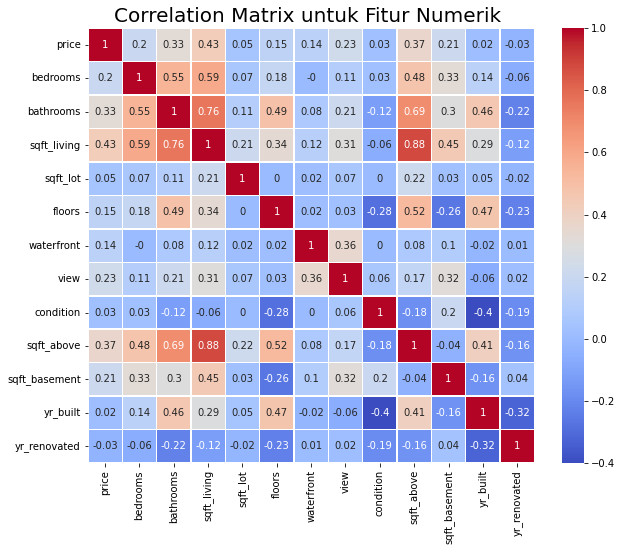

In [31]:
plt.figure(figsize=(10, 8))
correlation = df.corr().round(2)
 
sns.heatmap(data=correlation, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Drop feature dengan korelasi kecil (|corr| < 0.15)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


# Data Preperation

## Encoding fitur kategori

In [35]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['city'], prefix='city')],axis=1)
df.drop(['city'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


## Dimensi reduksi dengan PCA

Dapat dilihat dari corelation matrix bahwa sqft_living dan sqft_above memiliki korelasi yang cukup tinggi, maka dapat kita lakukan reduksi dimensi dengan PCA

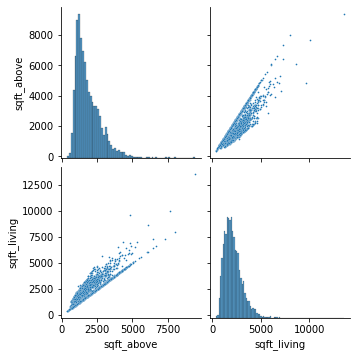

In [36]:
sns.pairplot(df[['sqft_above','sqft_living']], plot_kws={"s": 3});

In [41]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2, random_state=41004)
pca.fit(df[['sqft_above','sqft_living']])
princ_comp = pca.transform(df[['sqft_above','sqft_living']])

In [42]:
pca.explained_variance_ratio_.round(3)

array([0.939, 0.061])

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=41004)
pca.fit(df[['sqft_living','sqft_above']])
df['sqft'] = pca.transform(df.loc[:, ('sqft_living','sqft_above')]).flatten()
df.drop(['sqft_living','sqft_above'], axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,sqft
0,3.130000e+05,3.0,1.50,7912,1.5,0,0,3,0,1955,...,0,1,0,0,0,0,0,0,0,-921.863018
1,2.384000e+06,5.0,2.50,9050,2.0,0,4,5,280,1921,...,1,0,0,0,0,0,0,0,0,2153.357479
2,3.420000e+05,3.0,2.00,11947,1.0,0,0,4,0,1966,...,0,0,0,0,0,0,0,0,0,-89.133014
3,4.200000e+05,3.0,2.25,8030,1.0,0,0,4,1000,1963,...,0,0,0,0,0,0,0,0,0,-651.510183
4,5.500000e+05,4.0,2.50,10500,1.0,0,0,4,800,1976,...,0,0,0,0,0,0,0,0,0,-603.959462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,6360,1.0,0,0,4,0,1954,...,1,0,0,0,0,0,0,0,0,-681.923865
4596,5.343333e+05,3.0,2.50,7573,2.0,0,0,3,0,1983,...,0,0,0,0,0,0,0,0,0,-752.494204
4597,4.169042e+05,3.0,2.50,7014,2.0,0,0,3,0,2009,...,0,0,0,0,0,0,0,0,0,1435.186316
4598,2.034000e+05,4.0,2.00,6630,1.0,0,0,3,1020,1974,...,1,0,0,0,0,0,0,0,0,-537.707085


## Train test split

In [45]:
df.shape

(4600, 56)

In [46]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["price"],axis =1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41004)

In [47]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4600
Total # of sample in train dataset: 3680
Total # of sample in test dataset: 920


## Standarisasi

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     4600 non-null   float64
 1   bedrooms                  4600 non-null   float64
 2   bathrooms                 4600 non-null   float64
 3   sqft_lot                  4600 non-null   int64  
 4   floors                    4600 non-null   float64
 5   waterfront                4600 non-null   int64  
 6   view                      4600 non-null   int64  
 7   condition                 4600 non-null   int64  
 8   sqft_basement             4600 non-null   int64  
 9   yr_built                  4600 non-null   int64  
 10  yr_renovated              4600 non-null   int64  
 11  city_Algona               4600 non-null   uint8  
 12  city_Auburn               4600 non-null   uint8  
 13  city_Beaux Arts Village   4600 non-null   uint8  
 14  city_Bel

In [50]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft', 'sqft_basement', 'yr_built', 'yr_renovated']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft,sqft_basement,yr_built,yr_renovated
3910,1.749360,1.059120,0.083327,0.905757,-0.089124,-0.313493,-0.670878,1.136866,1.189352,-0.623508,1.230066
1337,0.651910,2.009898,-0.245906,0.905757,-0.089124,-0.313493,2.292905,0.853251,0.744059,-1.459018,-0.820120
3271,-1.542992,-0.842438,-0.372757,0.905757,-0.089124,-0.313493,-0.670878,-1.317755,-0.676641,1.147772,-0.820120
3454,0.651910,0.742193,-0.295510,-0.026864,-0.089124,-0.313493,-0.670878,0.581016,0.977308,-1.960324,1.224953
1607,-0.445541,0.108341,-0.087845,-0.959484,-0.089124,-0.313493,-0.670878,-0.725140,0.383583,0.245422,-0.820120


# Model Development

In [62]:
models = pd.DataFrame(index=['KNN', 'SVR', 'RandomForest', 'Boosting'],
                      columns=['train_mse', 'test_mse'])

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

## SVR

In [64]:
svr = SVR()
svr.fit(X_train,y_train)

models.loc['SVR','train_mse'] = mean_squared_error(y_true=y_train, y_pred=svr.predict(X_train))/1e3
models.loc['SVR','test_mse'] = mean_squared_error(y_true=y_test, y_pred=svr.predict(X_test))/1e3 

## KNN

In [65]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
 
models.loc['KNN','train_mse'] = mean_squared_error(y_true=y_train, y_pred=knn.predict(X_train))/1e3
models.loc['KNN','test_mse'] = mean_squared_error(y_true=y_test, y_pred=knn.predict(X_test))/1e3 

## Random Forest

In [66]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)
 
models.loc['RandomForest','train_mse'] = mean_squared_error(y_true=y_train, y_pred=randomforest.predict(X_train))/1e3
models.loc['RandomForest','test_mse'] = mean_squared_error(y_true=y_test, y_pred=randomforest.predict(X_test))/1e3 

## Boosting

In [67]:
boosting = AdaBoostRegressor()                             
boosting.fit(X_train, y_train)

models.loc['Boosting','train_mse'] = mean_squared_error(y_true=y_train, y_pred=boosting.predict(X_train))/1e3
models.loc['Boosting','test_mse'] = mean_squared_error(y_true=y_test, y_pred=boosting.predict(X_test))/1e3

## MAE Score

In [68]:
models

,train_mse,test_mse
KNN,43690966.259775,1039929857.856031
SVR,140278104.584199,1065628680.729189
RandomForest,7842307.336736,1662876761.296863
Boosting,76279641.282455,1328679991.10577


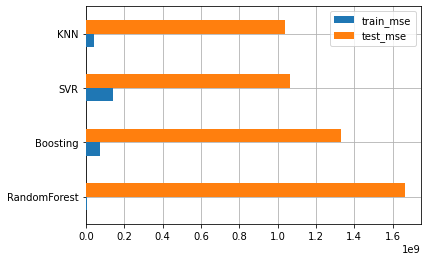

In [69]:
fig, ax = plt.subplots()
models.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Predict

In [71]:
prediksi = X_test.iloc[100:110].copy()
pred_dict = {'y_true':y_test[100:110]}
model_dict = {'KNN': knn, 'RandomForest': randomforest, 'Boosting': boosting, 'SVR': svr}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RandomForest,prediksi_Boosting,prediksi_SVR
2272,850830.0,573880.0,300170.0,516262.3,465155.5
99,1395000.0,963880.0,2673825.0,2182777.3,465155.5
431,290000.0,573880.0,349634.5,516262.3,465155.5
2177,345000.0,573880.0,300170.0,516262.3,465155.5
3881,334500.0,573880.0,295160.0,516262.3,465155.5
1321,379950.0,573880.0,360902.7,516262.3,465155.5
577,464000.0,573880.0,2529958.4,2182777.3,465155.5
1371,499950.0,573880.0,300170.0,516262.3,465155.5
864,487250.0,573880.0,300170.0,516262.3,465155.5
2850,380000.0,573880.0,633553.7,516262.3,465155.5
